In [330]:
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import utils


In [338]:
# Load the dataset
df = pd.read_csv('ena_1h_data.csv')

df.dropna(inplace=True)


In [332]:
df

,Datetime,ETH_Price,ETH_Returns,ENA_Price,ENA_Returns,claimed,Implied_APY
909,2024-05-10 07:00:00+00:00,3044.610840,-0.000791,0.892792,-0.009184,1349.758759,0.6695
910,2024-05-10 08:00:00+00:00,3034.450439,-0.003337,0.899631,0.007661,817295.558079,0.6789
911,2024-05-10 09:00:00+00:00,3032.583984,-0.000615,0.913862,0.015819,44128.360165,0.6817
912,2024-05-10 10:00:00+00:00,3029.004150,-0.001180,0.923416,0.010454,27496.414754,0.6269
913,2024-05-10 11:00:00+00:00,3037.237793,0.002718,0.933542,0.010966,165469.587617,0.6615
...,...,...,...,...,...,...,...
2285,2024-07-06 15:00:00+00:00,3020.968018,0.002349,0.386383,0.005134,55.223052,0.8350
2289,2024-07-06 19:00:00+00:00,3061.568604,0.001819,0.408672,0.011487,1064.805000,0.8372
2291,2024-07-06 21:00:00+00:00,3060.506348,-0.001214,0.415883,0.010463,26.244198,0.8412
2292,2024-07-06 22:00:00+00:00,3065.938477,0.001775,0.413358,-0.006072,622.436730,0.8186


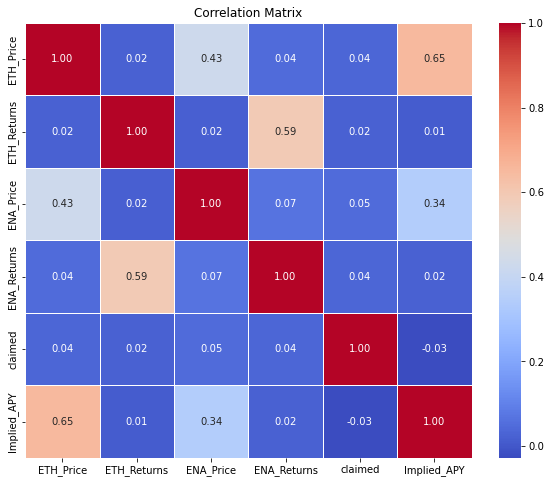

In [333]:
# Calculate the correlation matrix
corr = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [337]:
# Check VIF of potential predictor variables
X = df[['ETH_Returns', 'claimed', 'Implied_APY', 'ETH_Price']]

# Initialize DataFrame to store VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


       Feature         VIF
0  ETH_Returns    1.000591
1      claimed    1.007302
2  Implied_APY  175.296740
3    ETH_Price  175.365323


### Create a simple linear regression to investigate how much do eth returns explain the returns of ENA

In [ ]:
# Fit a linear regression model to the data
X = df['ETH_Returns'].values.reshape(-1, 1)
y = df['ENA_Returns'].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Print the coefficients of the model
print(f'Coefficient: {reg.coef_[0][0]:.4f}')
print(f'Intercept: {reg.intercept_[0]:.4f}')


Coefficient: 1.5276
Intercept: -0.0006


In [ ]:
score = reg.score(X_train, y_train)
score

0.3365107590957289

In [ ]:
# Evaluate the model using R-squared score
score = reg.score(X_test, y_test)
print(f'R^2 Score on Test Data: {score:.4f}')

# Predict on the test data
y_pred = reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

R^2 Score on Test Data: 0.4064
Mean Squared Error: 0.0001


Interestinlgly, the R squared is higher for the test data. Could this be due to ENA becoming a more mature asset and therefore more correlated with the market?

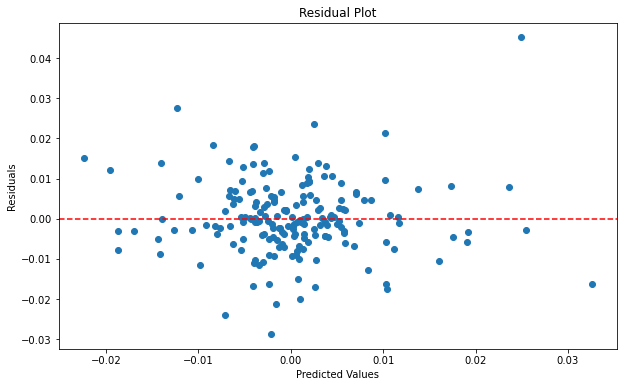

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals to check for any patterns
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Ena returns based on ETH returns and Implied APY

In [ ]:
# Define the features and the target
X = df[['ETH_Returns', 'Implied_APY', 'claimed']]  # features
y = df['ENA_Returns']                  # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R-squared: 0.4048
Mean Squared Error: 0.0001


In [ ]:
# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


              Coefficient
ETH_Returns  1.523896e+00
Implied_APY  4.604451e-03
claimed      4.407112e-11


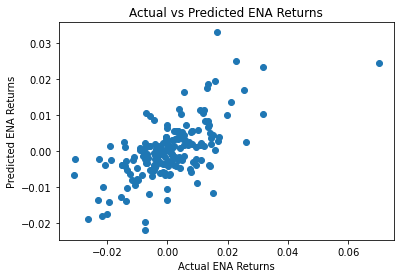

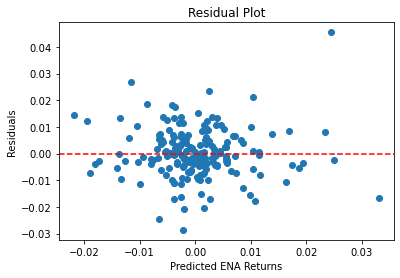

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ENA Returns')
plt.ylabel('Predicted ENA Returns')
plt.title('Actual vs Predicted ENA Returns')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted ENA Returns')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [339]:
# Check stationarity
# Load check_stationarity function from utils.py
check_stationarity = utils.check_stationarity

check_stationarity(df['ETH_Returns'], 'ETH Returns')
check_stationarity(df['Implied_APY'], 'Pendle Yield for ENA')
check_stationarity(df['claimed'], 'Claimed Tokens from ENA Airdrop')

Results of Dickey-Fuller Test for ETH Returns:
Test Statistic: -30.75537976402534
p-value: 0.0
Critical Values:
	1%: -3.43725945868569
	5%: -2.8645903751292536
	10%: -2.5683941938438886
Evidence against the null hypothesis, data is stationary
Results of Dickey-Fuller Test for Pendle Yield for ENA:
Test Statistic: -3.2552164487134263
p-value: 0.017002895802169182
Critical Values:
	1%: -3.437281430175827
	5%: -2.8646000638781532
	10%: -2.5683993544869015
Evidence against the null hypothesis, data is stationary
Results of Dickey-Fuller Test for Claimed Tokens from ENA Airdrop:
Test Statistic: -30.806744246645042
p-value: 0.0
Critical Values:
	1%: -3.43725945868569
	5%: -2.8645903751292536
	10%: -2.5683941938438886
Evidence against the null hypothesis, data is stationary


### Try out what lag of pendle yield explains the most of ENA returns, go up to lag 5

In [340]:
# Try out what lag of pendle yield explains the most of ENA returns, go up to lag 5
for i in range(0, 6):
    df[f'Pendle_Yield_ENA_Lag_{i}'] = df['Implied_APY'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

# Define the features and the target
X = df.filter(like='Pendle_Yield_ENA_Lag')  # features
y = df['ENA_Returns']                  # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression().fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


R-squared: -0.0369
Mean Squared Error: 0.0002
                        Coefficient
Pendle_Yield_ENA_Lag_0     0.038803
Pendle_Yield_ENA_Lag_1    -0.001371
Pendle_Yield_ENA_Lag_2    -0.037353
Pendle_Yield_ENA_Lag_3    -0.001636
Pendle_Yield_ENA_Lag_4     0.017669
Pendle_Yield_ENA_Lag_5    -0.009742


### Neural Net prediction

In [347]:
neural_net_data = df[['ENA_Price', 'ETH_Price', 'claimed', 'Implied_APY']]
neural_net_data['Target_ENA_Price'] = neural_net_data['ENA_Price'].shift(-1)
neural_net_data.dropna(inplace=True)

/tmp/ipykernel_35254/3191457423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neural_net_data['Target_ENA_Price'] = neural_net_data['ENA_Price'].shift(-1)


In [349]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
neural_net_data_scaled = sc.fit_transform(neural_net_data)

In [351]:
neural_net_data

,ENA_Price,ETH_Price,claimed,Implied_APY,Target_ENA_Price
914,0.915350,3028.308594,1087.002526,0.6673,0.912911
915,0.912911,3022.313721,7778.151574,0.6800,0.864655
916,0.864655,2944.836182,165.007142,0.6876,0.857230
917,0.857230,2919.212402,9963.417529,0.6712,0.845319
918,0.845319,2922.970703,9223.287630,0.6740,0.832443
...,...,...,...,...,...
2284,0.384410,3013.889404,674.441162,0.7663,0.386383
2285,0.386383,3020.968018,55.223052,0.8350,0.408672
2289,0.408672,3061.568604,1064.805000,0.8372,0.415883
2291,0.415883,3060.506348,26.244198,0.8412,0.413358


### Thoughts for next steps
- Can ENA be explained by X?
- Granger causality tests to investigate lead-lag relationships
- Cointegration tests
- LSTM to check if we can predict ENA prices based on the variables of interest